Осы аптадағы тәжірибелік зертханада сіз бір конфигурацияны қолданып көресіз және бұл желілердің көптеген түрлерінің тіркесімі: деректер терезелері конвульсиядан өтеді, одан кейін жинақталған LSTM, содан кейін жинақталған тығыз қабаттар.

## Қажетті модульдерді импорттаңыз

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
def plot_series(x, y, format="-", start=0, end=None,
                title=None, xlabel=None, ylabel=None, legend=None ):
    """
    Уақыттық қатар деректерін визуалдау

    Параметрлер:
      x (бүтін сандар массиві) - x осіне арналған мәндерді қамтиды
      y (бүтін сандар массиві немесе массивтердің жұбы) - y осіне арналған мәндерді қамтиды
      format (жол) - график сызығының стилі
      start (бүтін сан) - графикте көрсетілетін бірінші уақыт қадамы
      end (бүтін сан) - графикте көрсетілетін соңғы уақыт қадамы
      title (жол) - графиктің тақырыбы
      xlabel (жол) - x осінің атауы
      ylabel (жол) - y осінің атауы
      legend (жолдар тізімі) - графиктің легендасы
    """

    # График фигурасының өлшемдерін орнату
    plt.figure(figsize=(10, 6))

    # Екіден көп қатарды графиктеу қажет пе екенін тексеру
    if type(y) is tuple:

      # y элементтері бойынша цикл жасау
      for y_curr in y:

        # x және ағымдағы y мәндерін графиктеу
        plt.plot(x[start:end], y_curr[start:end], format)

    else:
      # x және y мәндерін графиктеу
      plt.plot(x[start:end], y[start:end], format)

    # x осінің атауын белгілеу
    plt.xlabel(xlabel)

    # y осінің атауын белгілеу
    plt.ylabel(ylabel)

    # Легенданы орнату
    if legend:
      plt.legend(legend)

    # Тақырыпты орнату
    plt.title(title)

    # Графиктің үстіне тор сызбасын қосу
    plt.grid(True)

    # Экранда графикті көрсету
    plt.show()

## Деректер жинағын жүктеп алыңыз және алдын ала қараңыз

In [11]:
!wget -nc https://www.kaggle.com/datasets/samfaraday/daily-minimum-temperatures-in-me

--2025-03-29 07:44:53--  https://www.kaggle.com/datasets/samfaraday/daily-minimum-temperatures-in-me
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘daily-minimum-temperatures-in-me’

daily-minimum-tempe     [ <=>                ]   9.59K  --.-KB/s    in 0.001s  

2025-03-29 07:44:54 (16.9 MB/s) - ‘daily-minimum-temperatures-in-me’ saved [9818]



In [18]:
# Тізімдерді инициализациялау
time_step = []
sunspots = []

# CSV файлын ашу
with open('daily-minimum-temperatures-in-me.csv') as csvfile:

  # Оқырманды инициализациялау
  reader = csv.reader(csvfile, delimiter=',')

  # Бірінші жолды өткізіп жіберу
  next(reader)

  # Әр жолдан уақыт қадамы мен күн нүктелерінің санын тізімге қосу
  for row in reader:
    time_step.append(int(row[0]))
    sunspots.append(float(row[2]))

# Тізімдерді numpy массивтеріне ауыстыру
time = np.array(time_step)
series = np.array(sunspots)

# Деректерді алдын ала қарау
plot_series(time, series, xlabel='Ай', ylabel='Ай сайынғы орташа күн нүктелерінің саны')

ValueError: invalid literal for int() with base 10: '1/1/1981'

In [20]:
import pandas as pd

df = pd.read_csv("daily-minimum-temperatures-in-me.csv")
df

,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8
...,...,...
3645,12/27/1990,14
3646,12/28/1990,13.6
3647,12/29/1990,13.5
3648,12/30/1990,15.7


In [23]:
print(f"Уақыт қадамдары саны: {len(time_step)}")
print(f"Күн нүктелері саны: {len(sunspots)}")


Уақыт қадамдары саны: 0
Күн нүктелері саны: 0


In [24]:
with open("daily-minimum-temperatures-in-me.csv", encoding="utf-8") as csvfile:
    reader = csv.reader(csvfile)
    for i, row in enumerate(reader):
        print(row)
        if i == 5:  # Тек 5 жол шығару
            break


['Date', 'Daily minimum temperatures']
['1/1/1981', '20.7']
['1/2/1981', '17.9']
['1/3/1981', '18.8']
['1/4/1981', '14.6']
['1/5/1981', '15.8']


Қате жол: ['7/20/1982', '?0.2'] (could not convert string to float: '?0.2')
Қате жол: ['7/21/1982', '?0.8'] (could not convert string to float: '?0.8')
Қате жол: ['7/14/1984', '?0.1'] (could not convert string to float: '?0.1')


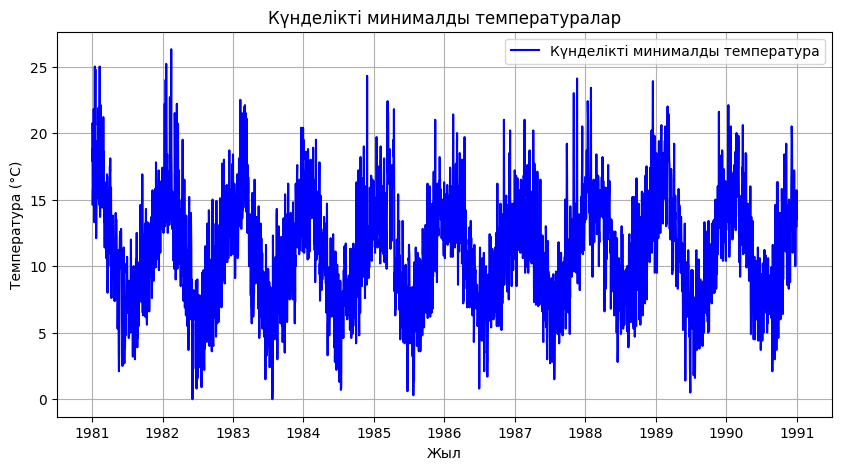

In [27]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Тізімдерді инициализациялау
time_step = []
temperatures = []

# CSV файлын ашу
with open("daily-minimum-temperatures-in-me.csv", encoding="utf-8") as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # Бірінші жолды өткізіп жіберу (баған атаулары)

    for row in reader:
        try:
            date = datetime.strptime(row[0].strip(), "%m/%d/%Y")  # Датаны дұрыс оқу
            temp_str = row[1].strip()  # Артық бос орындарды алып тастау

            # Егер мән "?" немесе бос болса, оны өткізіп жібереміз
            if temp_str in ["", "?", "NaN"]:
                continue

            temperature = float(temp_str)  # Температура мәнін алу
            time_step.append(date)
            temperatures.append(temperature)

        except ValueError as e:
            print(f"Қате жол: {row} ({e})")  # Қате жолдарды шығарып көрсету

# Деректерді numpy массивтеріне айналдыру
time = np.array(time_step)
series = np.array(temperatures)

# Деректерді визуализациялау
plt.figure(figsize=(10, 5))
plt.plot(time, series, label="Күнделікті минималды температура", color="blue")
plt.xlabel("Жыл")
plt.ylabel("Температура (°C)")
plt.title("Күнделікті минималды температуралар")
plt.legend()
plt.grid()
plt.show()


## Деректер жиынын бөліңіз

In [28]:
# Define the split time
split_time = 3000

# Get the train set
time_train = time[:split_time]
x_train = series[:split_time]

# Get the validation set
time_valid = time[split_time:]
x_valid = series[split_time:]

## Мүмкіндіктер мен белгілерді дайындаңыз

In [29]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    """Деректер жиынтығының терезелерін құрады

    Параметрлер:
      series (float сандар массиві) - уақыттық қатардың мәндерін қамтиды
      window_size (бүтін сан) - ерекшелікке енгізілетін уақыт қадамдарының саны
      batch_size (бүтін сан) - пакет көлемі
      shuffle_buffer (бүтін сан) - араластыру әдісі үшін қолданылатын буфер көлемі

    Қайтарады:
      dataset (TF Dataset) - уақыттық терезелерді қамтитын TF деректер жиынтығы
    """

    # RNN қабаттарының ерекшелік өлшемі үшін қосымша ось қосу
    series = tf.expand_dims(series, axis=-1)

    # Серия мәндерінен TF деректер жиынтығын жасау
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Деректерді терезеге бөлу, тек көрсетілген өлшемдегі терезелерді таңдау
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)

    # Терезелерді бір пакетке біріктіру арқылы тегістеу
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Ерекшеліктер мен белгілерді қамтитын кортеждерді жасау
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # Терезелерді араластыру
    dataset = dataset.shuffle(shuffle_buffer)

    # Терезелердің пакеттерін жасау
    dataset = dataset.batch(batch_size)

    # Оқыту үшін деректер жиынтығын оңтайландыру
    dataset = dataset.cache().prefetch(1)

    return dataset

егер сіздің нәтижелеріңіз жақсы болмаса, мұнда параметрлерді өзгертуге және модельдің жақсырақ үйренетінін көруге болады.

In [30]:
# Параметрлер
window_size = 30
batch_size = 32
shuffle_buffer_size = 1000

# Деректер жиынының терезелерін жасаңыз
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

## Үлгіні құрастыру

In [31]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(window_size,1)),
    tf.keras.layers.Conv1D(filters=64, kernel_size=3,
                      strides=1,
                      activation="relu",
                      padding='causal'),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Lambda(lambda x: x * 400)
])

# Үлгінің қысқаша мазмұнын басып шығарыңыз
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 30, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 30, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 30)                  │           1,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda (Lambda)                      │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 68,575 (267.87 KB)

 Trainable params: 68,575 (267.87 KB)

 Non-trainable params: 0 (0.00 B)

## Оқу жылдамдығын реттеңіз

оңтайлы оқу жылдамдығын таңдағыңыз келеді.

In [32]:
# Бастапқы салмақтарды алыңыз
init_weights = model.get_weights()

In [33]:
# Оқу жылдамдығын реттегішті орнату
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

# Оптимизаторды инициализациялау
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# Оқыту параметрлерін орнату
model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer)

# Модельді оқыту
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 128.3322 - learning_rate: 1.0000e-08
Epoch 2/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 75.6999 - learning_rate: 1.1220e-08
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 48.0621 - learning_rate: 1.2589e-08
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 23.4788 - learning_rate: 1.4125e-08
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.4941 - learning_rate: 1.5849e-08
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.5082 - learning_rate: 1.7783e-08
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.3980 - learning_rate: 1.9953e-08
Epoch 8/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.3075 - learning_rate: 2.2387e-08
Epoch 9/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.2278 - learning_rate: 2.5119e-08
Epoch 10/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.1599 - learning_rate: 2.8184e-08
Epoch 11/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.1051 - learning_rate: 3.1623e-08
Epoch 12/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.0571 

(np.float64(1e-08), np.float64(0.001), np.float64(0.0), np.float64(100.0))

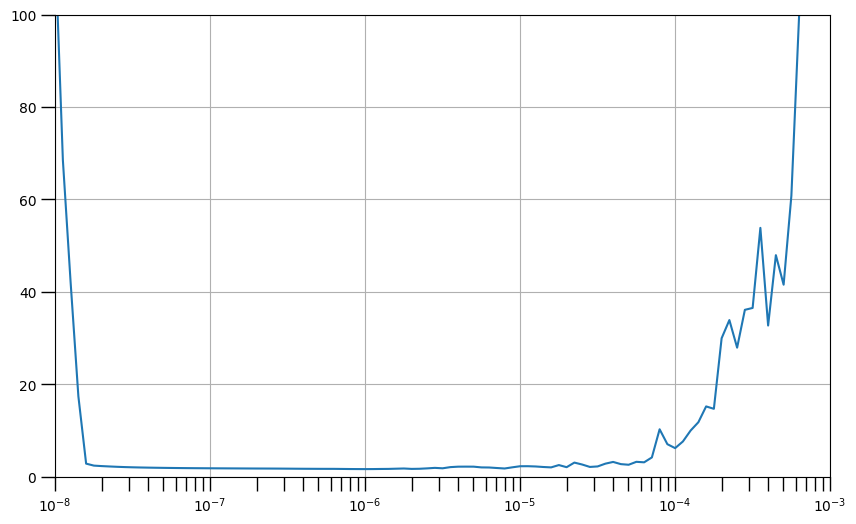

In [34]:
# Оқу жылдамдығының массивін анықтау
lrs = 1e-8 * (10 ** (np.arange(100) / 20))

# Фигураның өлшемін орнату
plt.figure(figsize=(10, 6))

# Торды орнату
plt.grid(True)

# Логарифмдік масштабта жоғалту мәнін графиктеу
plt.semilogx(lrs, history.history["loss"])

# Тик белгішелерінің өлшемін ұлғайту
plt.tick_params('both', length=10, width=1, which='both')

# Графиктің шекараларын орнату
plt.axis([1e-8, 1e-3, 0, 100])

## Үлгіні жаттықтыру

Енді үлгіні қалпына келтіруге және үйретуге болады. Ол төмендегі ұяшықта 100 дәуірге орнатылған, бірақ қаласаңыз, оны көбейтуге болады.

In [35]:
# Keras жасаған күйді қалпына келтіру
tf.keras.backend.clear_session()

# Салмақтарды қалпына келтіру
model.set_weights(init_weights)

In [36]:
# Оқу жылдамдығын орнату
learning_rate = 8e-7

# Оптимизаторды орнату
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

# Оқыту параметрлерін орнату
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [37]:
# Модельді оқыту
history = model.fit(train_set, epochs=100)

Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 37.8341 - mae: 38.3236
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.9415 - mae: 2.3972
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.8945 - mae: 2.3497
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.8543 - mae: 2.3083
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.8015 - mae: 2.2542
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.7807 - mae: 2.2344
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.7666 - mae: 2.2185
Epoch 8/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.7466 - mae: 2.1972
Epoch 9/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.7200 - mae: 2.1688
Epoch 10/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.7034 - mae: 2.1508
Epoch 11/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.6912 - mae: 2.1381
Epoch 12/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.6813 - mae: 2.1273
Epoch 13/100
93/93 ━━━━━━━━━━━━━━━━

Сіз жаттығуды визуализациялай аласыз және жоғалту мен MAE әлі де төмендейтінін көре аласыз.

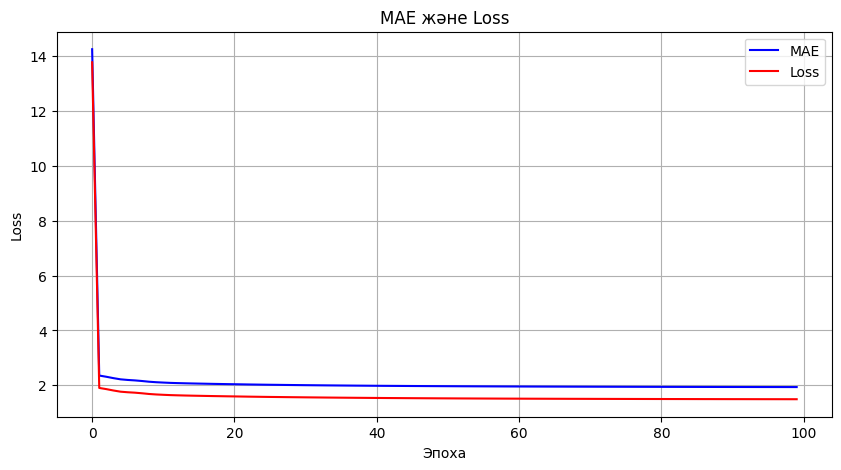

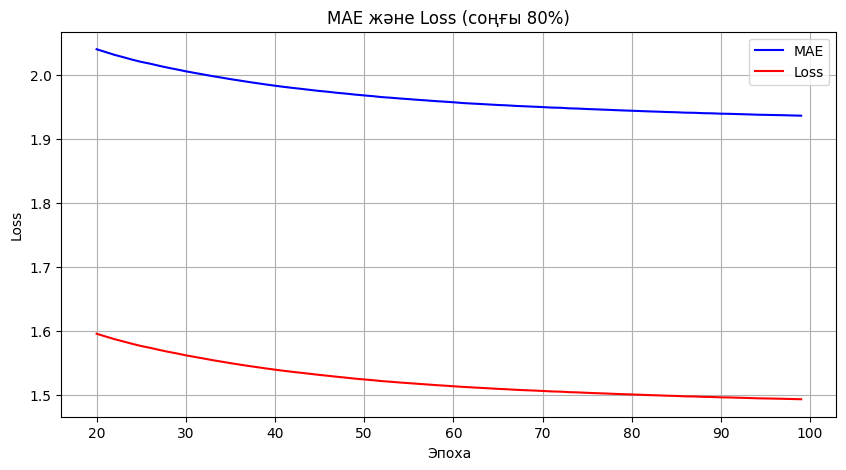

In [39]:
import matplotlib.pyplot as plt

# Тарих жазбасынан mae және loss мәндерін алу
mae = history.history['mae']
loss = history.history['loss']

# Эпохалардың санын алу
epochs = list(range(len(loss)))  # `range` → `list`

# MAE және Loss графигін салу
plt.figure(figsize=(10, 5))
plt.plot(epochs, mae, label="MAE", color="blue")
plt.plot(epochs, loss, label="Loss", color="red")
plt.xlabel("Эпоха")
plt.ylabel("Loss")
plt.title("MAE және Loss")
plt.legend()
plt.grid()
plt.show()

# Тек соңғы 80% эпохаларды графиктеу
zoom_split = int(len(epochs) * 0.2)
epochs_zoom = epochs[zoom_split:]
mae_zoom = mae[zoom_split:]
loss_zoom = loss[zoom_split:]

# Үлкейтілген MAE және Loss графигін салу
plt.figure(figsize=(10, 5))
plt.plot(epochs_zoom, mae_zoom, label="MAE", color="blue")
plt.plot(epochs_zoom, loss_zoom, label="Loss", color="red")
plt.xlabel("Эпоха")
plt.ylabel("Loss")
plt.title("MAE және Loss (соңғы 80%)")
plt.legend()
plt.grid()
plt.show()


## Модель болжауы

Алдыңғыдай, валидациялық жиынтықтың уақыт диапазоны бойынша болжамдарды алып, метрикаларды есептей аласыз.

In [40]:
def model_forecast(model, series, window_size, batch_size):
    """Модельді қолданып, деректер терезелеріндегі болжамдарды генерациялайды

    Параметрлер:
      model (TF Keras Model) - деректер терезелерін қабылдайтын модель
      series (float сандар массиві) - уақыттық қатардың мәндерін қамтиды
      window_size (бүтін сан) - терезеге енгізілетін уақыт қадамдарының саны
      batch_size (бүтін сан) - пакет көлемі

    Қайтарады:
      forecast (numpy массиві) - болжамдарды қамтитын массив
    """

    # RNN қабаттарының ерекшелік өлшемі үшін қосымша ось қосу
    series = tf.expand_dims(series, axis=-1)

    # Серия мәндерінен TF деректер жиынтығын жасау
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Деректерді терезеге бөлу, тек көрсетілген өлшемдегі терезелерді таңдау
    dataset = dataset.window(window_size, shift=1, drop_remainder=True)

    # Терезелерді бір пакетке біріктіру арқылы тегістеу
    dataset = dataset.flat_map(lambda w: w.batch(window_size))

    # Терезелердің пакеттерін жасау және алдын ала жүктеу
    dataset = dataset.batch(batch_size).prefetch(1)

    # Барлық деректер жиынтығына болжам алу
    forecast = model.predict(dataset, verbose=0)

    return forecast


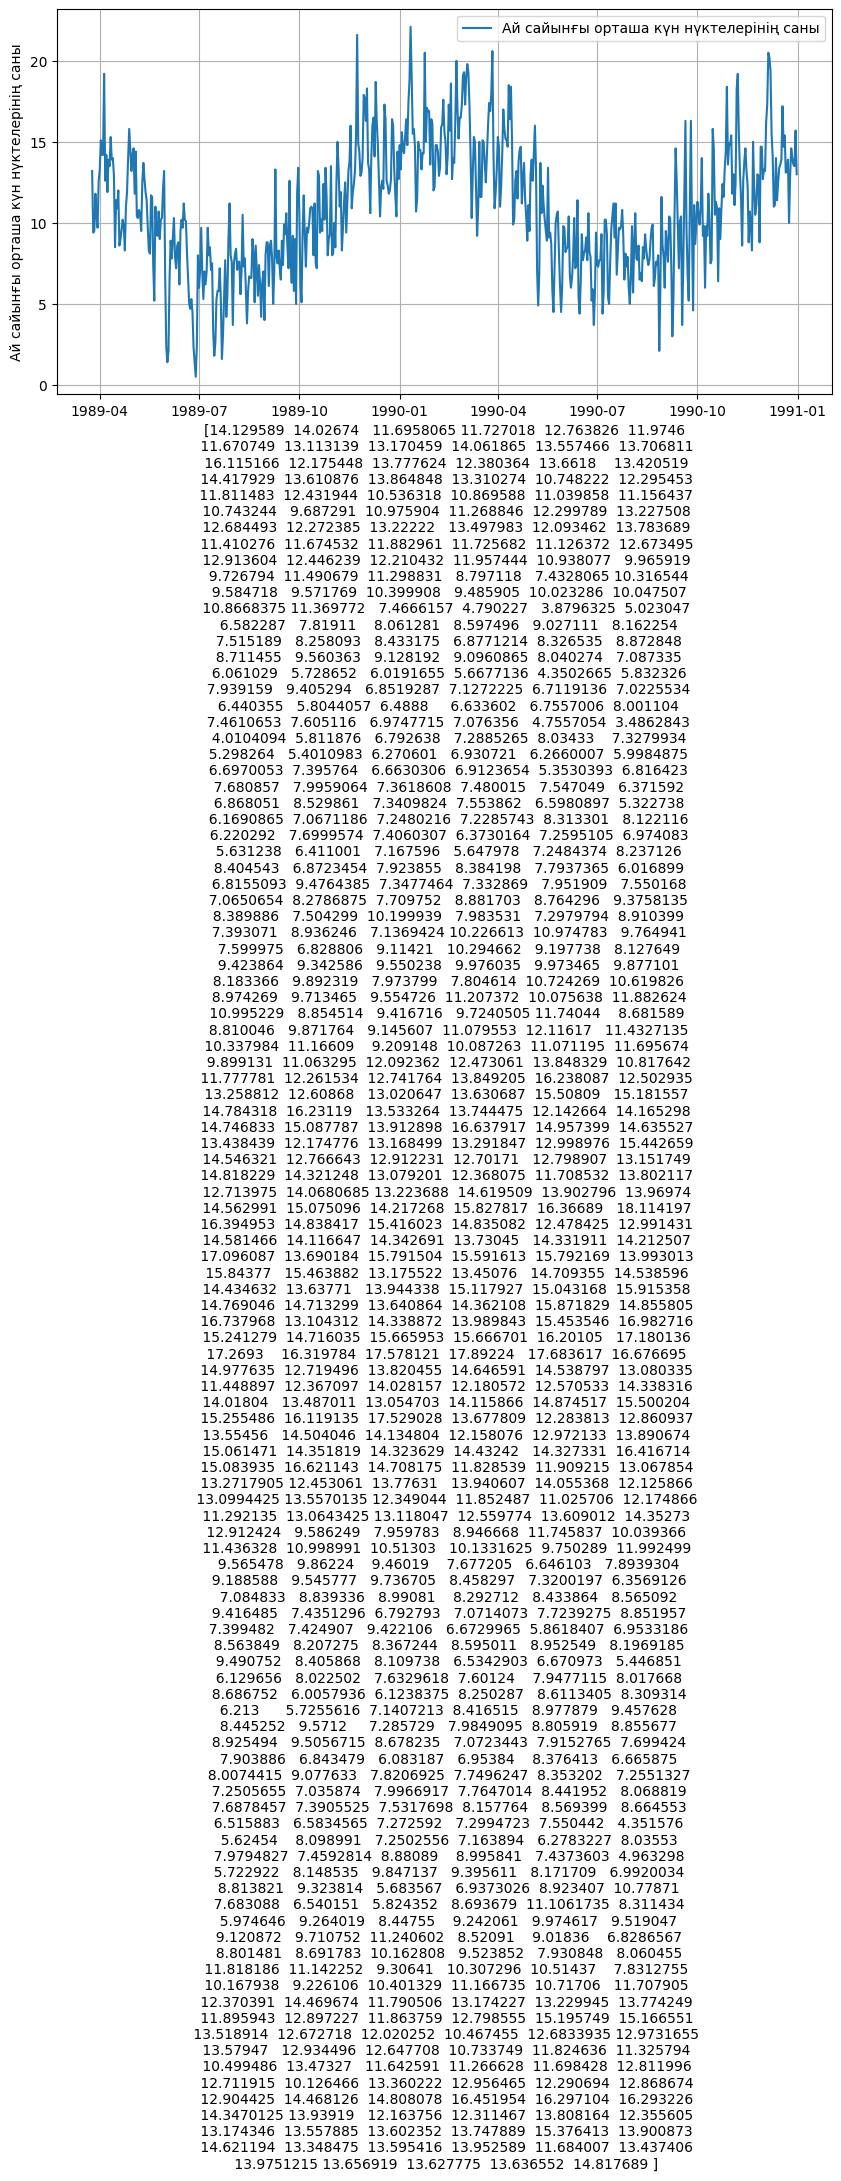

In [43]:
# Түпнұсқа қатарды қысқарту
forecast_series = series[split_time-window_size:-1]

# Болжамдарды генерациялау үшін көмекші функцияны қолдану
forecast = model_forecast(model, forecast_series, window_size, batch_size)

# Бірөлшемді осьті алып тастау
results = forecast.squeeze()

plot_series(time_valid, *[x_valid, results])


In [44]:
# Compute the MAE
print(tf.keras.metrics.mae(x_valid, results).numpy())

1.7622287


## Тапсырма

Уақыт қатарларының деректер жинағын желіден табыңыз немесе оны өзіңіз талдай аласыз, берілген үлгіні пайдаланып уақыт қатарының болжамын жасаңыз